# ABAnnotate example: pain processing

## Plot brain map

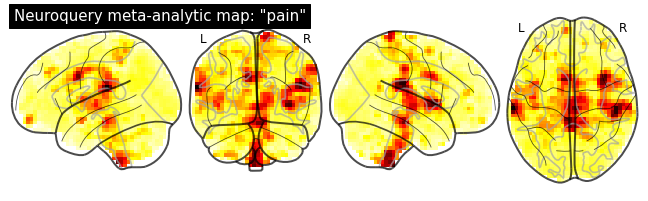

In [3]:
from nilearn.plotting import plot_glass_brain

z_plot = plot_glass_brain('neuroquery_pain.nii', display_mode='lyrz', title='Neuroquery meta-analytic map: "pain"')
z_plot.savefig('img/pain_vol.png', dpi=150)

## Plot cell types

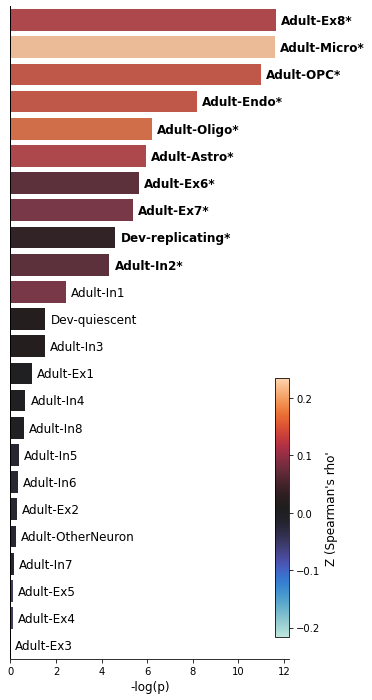

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# function to generate colors
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

# load data
cell = pd.read_csv('gcea/GCEA_pain_celltypes.csv')

# PLOT
fig, axes = plt.subplots(1,1, figsize=(5,12))
cell_plot = sns.barplot(data=cell, x=-np.log(cell.pValZ), y='cLabel', ax=axes, palette=colors_from_values(cell.cScorePheno, 'icefire'))

# labels
for i, p in enumerate(cell_plot.patches):
    x = p.get_x() + p.get_width()
    xy = (5, -15)
    label = cell.cLabel[i]+'*' if cell.pValPermCorr[i]<0.05 else cell.cLabel[i]
    weight = 'bold' if cell.pValPermCorr[i]<0.05 else 'normal'
    cell_plot.annotate(label, (x, p.get_y()), xytext=xy, textcoords='offset points', size=12, weight=weight)
# style
cell_plot.axvline(0, color='k', linewidth=1)
cell_plot.set_xlabel('-log(p)', fontsize=12)
cell_plot.set(yticklabels=[], ylabel=None)
cell_plot.tick_params(left=False)
sns.despine(fig, None, True, True, True, False)
# cbar
cb = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=cell.cScorePheno.min(), vmax=cell.cScorePheno.max()), 
                  cmap='icefire'), orientation='vertical', cax=fig.add_axes([0.86, 0.15, 0.04, 0.3]))
cb.set_label("Z (Spearman's rho'", size=12)
# save
plt.savefig('img/pain_cells.jpg', bbox_inches='tight', dpi=200)

## Plot BrainSPan

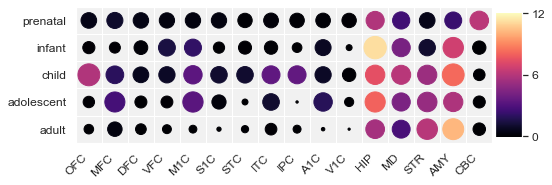

In [50]:
import pandas as pd
from heatmap import heatmap
import seaborn as sns
sns.set(color_codes=True, font_scale=1.1)

devel = pd.read_csv('gcea/GCEA_pain_brainspan.csv')
devel['age'] = [l.split('_')[0] for l in devel.cLabel]
devel['region'] = [l.split('_')[1] for l in devel.cLabel]

age_order = ['adult', 'adolescent', 'child', 'infant', 'prenatal']
region_order = ['OFC', 'MFC', 'DFC', 'VFC', 'M1C', 'S1C', 'STC', 'ITC', 'IPC', 
                'A1C', 'V1C', 'HIP', 'MD', 'STR', 'AMY', 'CBC']

plt.figure(figsize=(8, 2.5))
heatmap(x=devel['region'], y=devel['age'], y_order=age_order, x_order=region_order,
        color=-np.log(devel['pValZ']), size=devel['cScorePheno'], marker='o',
        palette=sns.color_palette('magma_r', 500)[::-1], color_range=(0,12))
plt.annotate('test', (2.2,0.5))
plt.savefig('img/pain_development.jpg', bbox_inches='tight', dpi=200)